In [22]:
from pathlib import Path
from PIL import Image, ImageFilter
import matplotlib.pyplot as plt
import numpy as np

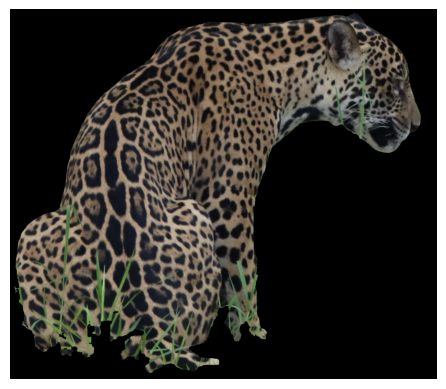

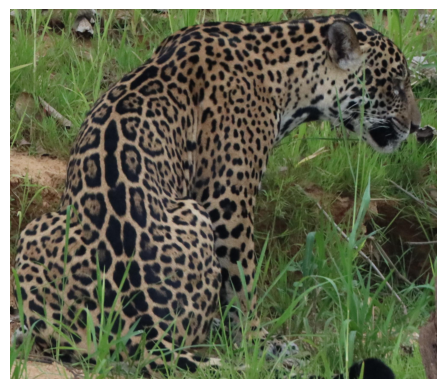

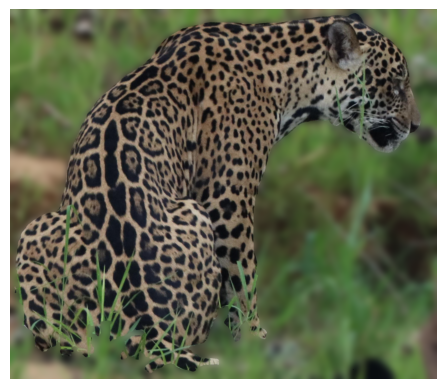

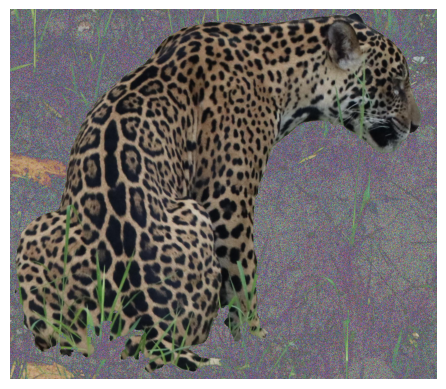

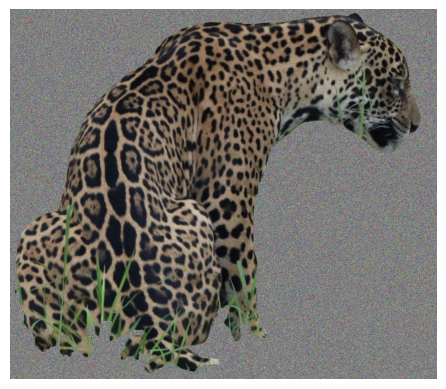

In [ ]:
IMAGE = Path("../../data/train/train/train_0009.png")
img = Image.open(IMAGE).convert("RGBA")

def plot_img(img):
    plt.imshow(img)
    plt.axis("off")
    plt.show()

def segment_background(img, background_color=(0, 0, 0)):
    bg = Image.new("RGB", img.size, background_color)
    bg.paste(img, mask=img.split()[3]) 
    return bg

def with_background(img):
    return img.convert("RGB")

def blurred_background(img, blur_radius=1000):
    blurred_img = img.convert("RGB").filter(ImageFilter.GaussianBlur(radius=blur_radius))
    r, g, b, a = img.split()
    final_img = Image.composite(img, blurred_img, a)
    return final_img

def noisy_background(img):
    r, g, b, a = img.split()
    img_np = np.array(img.convert("RGB"))
    img_rgb_np = np.array(img.convert("RGB"))
    noise = np.random.randint(0, 255, (img.height, img.width, 3), dtype=np.int16)
    noisy_img_np = np.clip(img_rgb_np + noise, 0, 255).astype(np.uint8)
    noisy_img_np = img_np + np.clip(noisy_img_np, 0, 255).astype(np.uint8)
    noisy_img = Image.fromarray(noisy_img_np, mode="RGB")
    final_img = Image.composite(img.convert("RGB"), noisy_img, a)
    return final_img

def random_background(img):
    r, g, b, a = img.split()
    noise = np.random.randint(0, 256, (img.height, img.width, 3), dtype=np.uint8)
    noisy_img = Image.fromarray(noise, mode="RGB")
    final_img = Image.composite(img.convert("RGB"), noisy_img, a)
    return final_img

plot_img(segment_background(img))
plot_img(with_background(img))
plot_img(blurred_background(img, blur_radius=15))
plot_img(noisy_background(img))
plot_img(random_background(img))